# Action Graph 

In [1]:
import syft as sy
from syft.service.action.action_graph_service import ActionGraphService, NodeActionDataUpdate, ActionStatus
from syft.service.action.action_graph import InMemoryActionGraphStore, InMemoryGraphConfig, InMemoryStoreClientConfig

from syft.service.context import AuthedServiceContext
from syft.node.credentials import SyftSigningKey
from syft.service.action.action_graph import Action
from syft.service.action.numpy import NumpyArrayObject, ActionObject
import numpy as np
import matplotlib.pyplot as plt

kj/filesystem-disk-unix.c++:1703: warning: PWD environment variable doesn't match current directory; pwd = /home/shubham/PySyft


## Scenario for performing some computation

```python

import syft as sy

domain_client = sy.login("....")

dataset = domain_client.datasets[0]

a = dataset.assets["A"]

b = dataset.assets["B"]

c = a + b

d = domain_client.api.numpy.array([1, 2, 3])

e = c * d

# Inplace operation, mutated the value of d
d.astype('int32')

f = d + 48
```

<br>
<br>

**Corresponding Actions Generated**

```

action1 -> a + b

action2 -> initialization of variable `d`

action3 -> c * d

action4 -> inplace updation of type of `d` (d.astype('int32'))

action5 -> d + 48

```

![graph.png](graph.png)

### Initializing the Store

In [2]:
# Create a Config

store_config = InMemoryGraphConfig()

In [3]:
# Initialize the InMemory Store

graph_store = InMemoryActionGraphStore(store_config=store_config)

### Initializing Action Graph Service

In [4]:
action_graph_service = ActionGraphService(store=graph_store)

In [5]:
signing_key = SyftSigningKey.generate()
authed_context = AuthedServiceContext(credentials=signing_key.verify_key)

In [6]:
signing_key = SyftSigningKey.generate()
authed_context = AuthedServiceContext(credentials=signing_key.verify_key)

### Create some dummy data

In [7]:
action_obj_a = ActionObject.from_obj([2, 4, 6])
action_obj_b = ActionObject.from_obj([2, 3, 4])

In [8]:
action_obj_a.id, action_obj_b.id

(<UID: c8eab9fccc6644508ae3b705ee53ec5f>,
 <UID: f22788bcf57d4e33b01505da5567c52e>)

### Action1 -> A + B

In [9]:
action1 = Action(
    path="action.execute",
    op="__add__",
    remote_self=action_obj_a.syft_lineage_id,
    args=[action_obj_b.syft_lineage_id],
    kwargs={}
)
action1

```python
class Action:
  id: str = c9583a522d7543a4a7f1b046e6385e17
  path: str = "action.execute"
  op: str = "__add__"
  remote_self: str = c8eab9fccc6644508ae3b705ee53ec5f
  args: str = [<LineageID: f22788bcf57d4e33b01505da5567c52e - 94940363769394952>]
  kwargs: str = {}
  result_id: str = c4c6fd818f4f4ac6b9ba7f72b8848c00

```

### Save action to Graph

In [10]:
action_graph_service.add_action

<bound method ActionGraphService.add_action of <syft.service.action.action_graph_service.ActionGraphService object at 0x7fbd5c469160>>

In [11]:
action_graph_service.add_action(context=authed_context, action=action1)

```python
class NodeActionData:
  id: str = c9583a522d7543a4a7f1b046e6385e17
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-24 02:49:17
  updated_at: str = None
  user_verify_key: str = b4f97fe25ba67780d54825933a128f072f2a8215face2fb323de9a73b803bf23
  is_mutated: str = False

```

### Action2 -> np.array([1, 2, 3])

In [12]:
action_obj_d = ActionObject.from_obj([1, 2, 3])

In [13]:
# Create Action2

action2 = Action(
    path="action.execute",
    op="np.array",
    remote_self=None,
    args=[action_obj_d.syft_lineage_id],
    kwargs={}
)
action2

```python
class Action:
  id: str = 4b5a782928094230b8138e4d42b2f95e
  path: str = "action.execute"
  op: str = "np.array"
  remote_self: str = None
  args: str = [<LineageID: cb7476a08a74439ab10efe38121386f5 - 914990746295444477>]
  kwargs: str = {}
  result_id: str = 7eb6c8805be5400b8b681942f613c05b

```

In [14]:
# Save action to graph
action_graph_service.add_action(context=authed_context, action=action2)

```python
class NodeActionData:
  id: str = 4b5a782928094230b8138e4d42b2f95e
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-24 02:49:17
  updated_at: str = None
  user_verify_key: str = b4f97fe25ba67780d54825933a128f072f2a8215face2fb323de9a73b803bf23
  is_mutated: str = False

```

In [15]:
# 747749f9494345b78e165f13351e52bf: {"data": NodeActionData()}

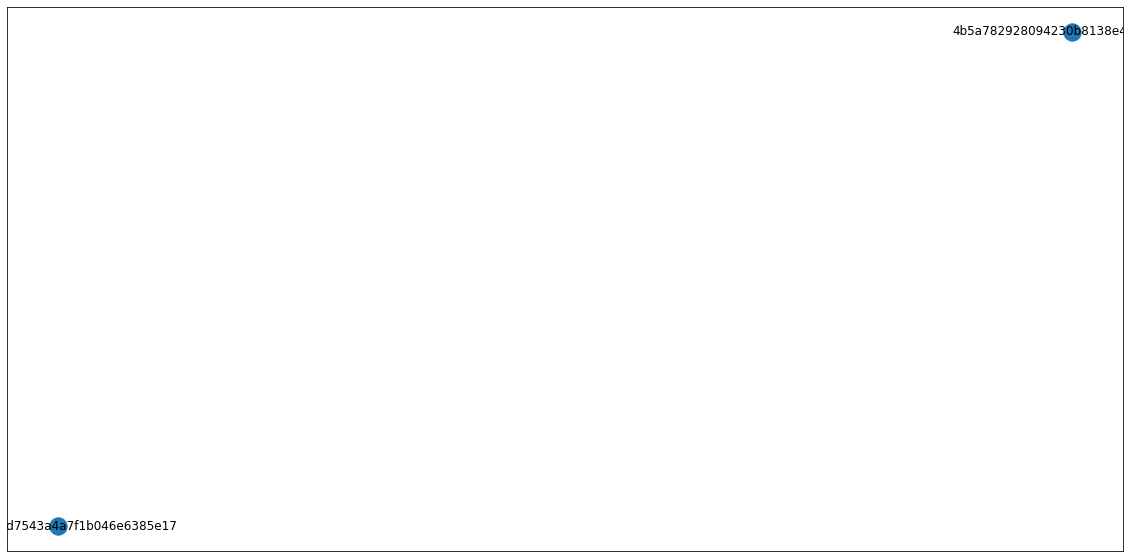

In [16]:
plt.figure(figsize=(20, 10))
action_graph_service.store.graph.visualize()

### Action3 -> C * D

In [17]:
action3 = Action(
    path="action.execute",
    op="__mul__",
    remote_self=action1.result_id,
    args=[action2.result_id],
    kwargs={}
)
action3

```python
class Action:
  id: str = e0ef9c334d0c4062a860e4e7c5fb9d26
  path: str = "action.execute"
  op: str = "__mul__"
  remote_self: str = c4c6fd818f4f4ac6b9ba7f72b8848c00
  args: str = [<LineageID: 7eb6c8805be5400b8b681942f613c05b - 80604397850968279>]
  kwargs: str = {}
  result_id: str = 638aacd6a4524753b3f07bddf06e6cc1

```

In [18]:
action_graph_service.add_action(context=authed_context, action=action3)

```python
class NodeActionData:
  id: str = e0ef9c334d0c4062a860e4e7c5fb9d26
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-24 02:49:17
  updated_at: str = None
  user_verify_key: str = b4f97fe25ba67780d54825933a128f072f2a8215face2fb323de9a73b803bf23
  is_mutated: str = False

```

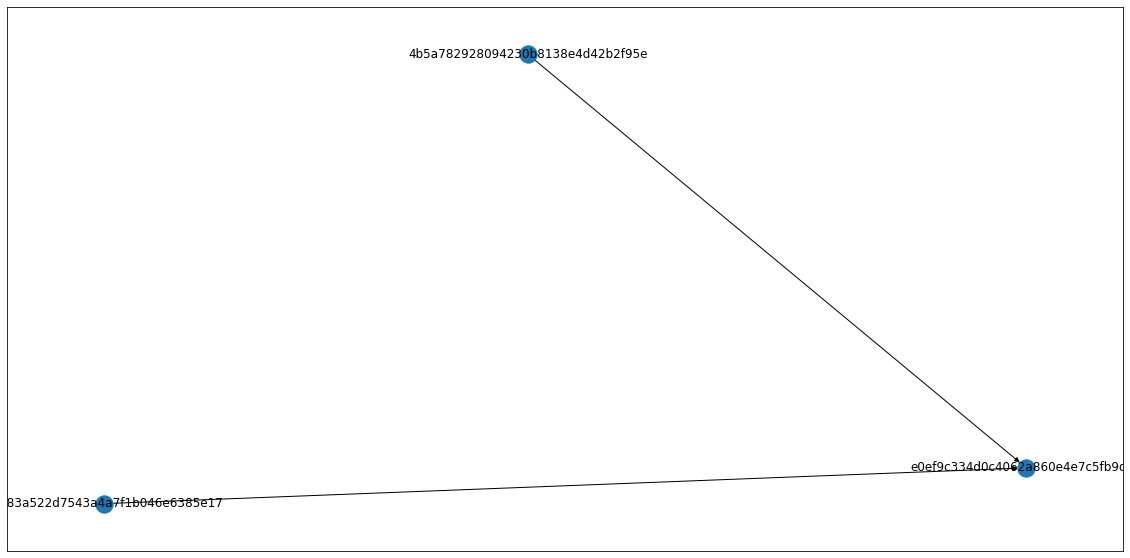

In [19]:
plt.figure(figsize=(20, 10))
action_graph_service.store.graph.visualize()

### Action4 -> Mutate type of D

In [20]:
as_type_action_obj = ActionObject.from_obj('np.int32')

In [21]:
as_type_action_obj

'np.int32'

In [22]:
action4 = Action(
    path="action.execute",
    op="astype",
    remote_self=action2.result_id,
    args=[as_type_action_obj.syft_lineage_id],
    kwargs={},
    result_id=action2.result_id
)
action4

```python
class Action:
  id: str = 662a1a6aa1f44aa3a6a3e309cc8d1461
  path: str = "action.execute"
  op: str = "astype"
  remote_self: str = 7eb6c8805be5400b8b681942f613c05b
  args: str = [<LineageID: 15c6849e068647d29496f5f58101127a - 201284182237991188>]
  kwargs: str = {}
  result_id: str = 7eb6c8805be5400b8b681942f613c05b

```

In [23]:
action_graph_service.add_action(context=authed_context, action=action4)

```python
class NodeActionData:
  id: str = 662a1a6aa1f44aa3a6a3e309cc8d1461
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-24 02:49:17
  updated_at: str = None
  user_verify_key: str = b4f97fe25ba67780d54825933a128f072f2a8215face2fb323de9a73b803bf23
  is_mutated: str = False

```

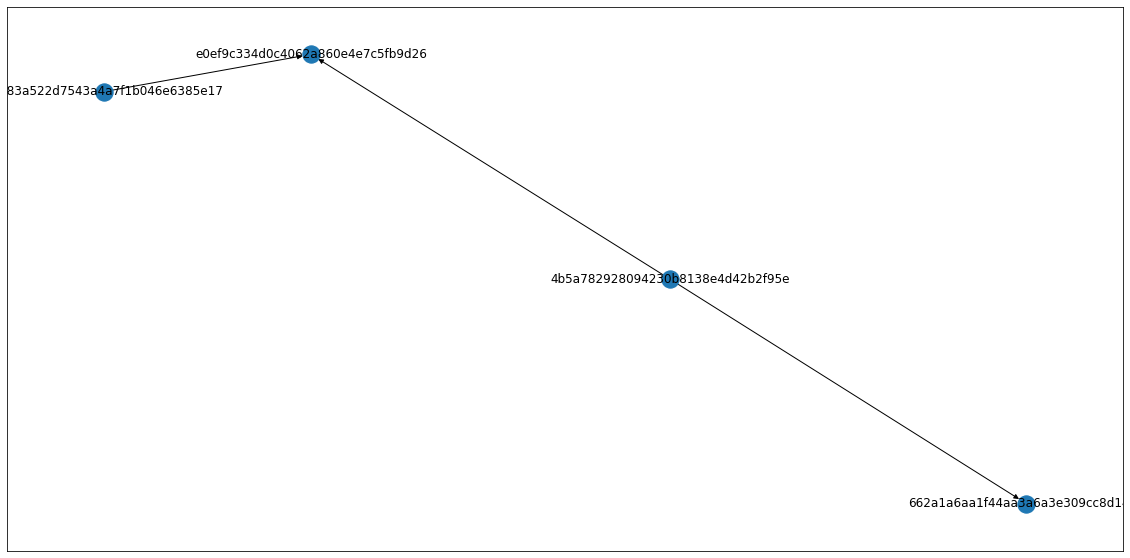

In [24]:
plt.figure(figsize=(20, 10))
action_graph_service.store.graph.visualize()

In [25]:
action_2_node_data = action_graph_service.store.get(uid=action2.id, credentials=authed_context.credentials).ok()
action_2_node_data

```python
class NodeActionData:
  id: str = 4b5a782928094230b8138e4d42b2f95e
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-24 02:49:17
  updated_at: str = None
  user_verify_key: str = b4f97fe25ba67780d54825933a128f072f2a8215face2fb323de9a73b803bf23
  is_mutated: str = False

```

In [26]:
action_graph_service.update(context=authed_context, action_id=action2.id, node_data=NodeActionDataUpdate(is_mutated=True))

```python
class NodeActionData:
  id: str = 4b5a782928094230b8138e4d42b2f95e
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-24 02:49:17
  updated_at: str = 2023-04-24 02:49:17
  user_verify_key: str = b4f97fe25ba67780d54825933a128f072f2a8215face2fb323de9a73b803bf23
  is_mutated: str = True

```

In [27]:
action_graph_service.store.get(uid=action2.id, credentials=authed_context.credentials).ok()

```python
class NodeActionData:
  id: str = 4b5a782928094230b8138e4d42b2f95e
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-24 02:49:17
  updated_at: str = 2023-04-24 02:49:17
  user_verify_key: str = b4f97fe25ba67780d54825933a128f072f2a8215face2fb323de9a73b803bf23
  is_mutated: str = True

```

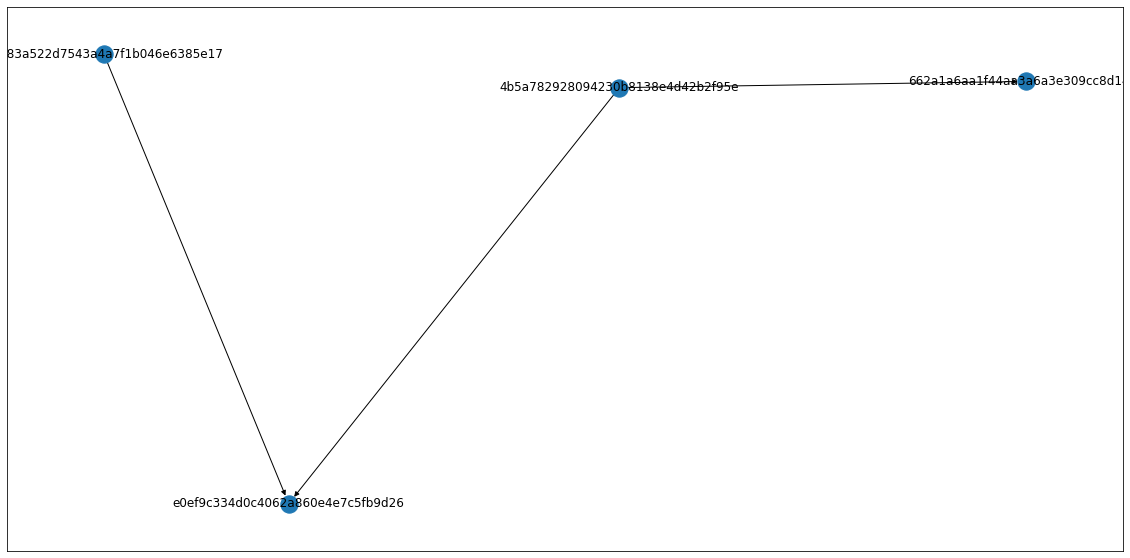

In [28]:
plt.figure(figsize=(20, 10))
action_graph_service.store.graph.visualize()

### Action5 -> D + 48

In [29]:
arg_action_obj = ActionObject.from_obj(48)

In [30]:
# action2.result_id == action4.result_id

In [31]:
action5 = Action(
    path="action.execute",
    op="__add__",
    remote_self=action2.result_id,
    args=[arg_action_obj.syft_lineage_id],
    kwargs={},
)
action5

```python
class Action:
  id: str = 4086b22ae47d4599bd752dc87511e84b
  path: str = "action.execute"
  op: str = "__add__"
  remote_self: str = 7eb6c8805be5400b8b681942f613c05b
  args: str = [<LineageID: fff20abe49714359aa653518f82afeb9 - 717632596132305350>]
  kwargs: str = {}
  result_id: str = 4779f11c79624e1c8ee4dc465df5becd

```

In [32]:
action_graph_service.add_action(context=authed_context, action=action5)

```python
class NodeActionData:
  id: str = 4086b22ae47d4599bd752dc87511e84b
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-24 02:49:17
  updated_at: str = None
  user_verify_key: str = b4f97fe25ba67780d54825933a128f072f2a8215face2fb323de9a73b803bf23
  is_mutated: str = False

```

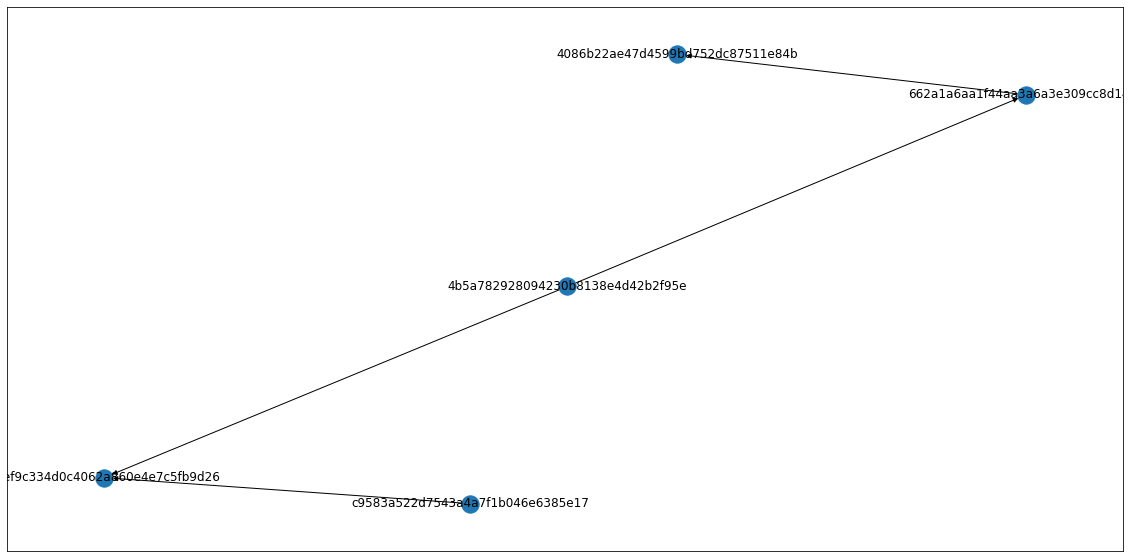

In [33]:
plt.figure(figsize=(20, 10))
action_graph_service.store.graph.visualize()

In [34]:
action1.id, action2.id, action3.id, action4.id, action5.id

(<UID: c9583a522d7543a4a7f1b046e6385e17>,
 <UID: 4b5a782928094230b8138e4d42b2f95e>,
 <UID: e0ef9c334d0c4062a860e4e7c5fb9d26>,
 <UID: 662a1a6aa1f44aa3a6a3e309cc8d1461>,
 <UID: 4086b22ae47d4599bd752dc87511e84b>)

```

action1 -> a + b

action2 -> initialization of variable `d`

action3 -> c * d

action4 -> inplace updation of type of `d` (d.astype('int32'))

action5 -> d + 48

```

## Filtering Actions in the Graph

### Filter by ActionStatus

```
ActionStatus
- PROCESSING
- DONE
- FAILED
```

In [35]:
action_graph_service.get_by_action_status(context=authed_context, status=ActionStatus.PROCESSING)

,type,id
0,<UID: c9583a522d7543a4a7f1b046e6385e17>,None
1,<UID: 4b5a782928094230b8138e4d42b2f95e>,None
2,<UID: e0ef9c334d0c4062a860e4e7c5fb9d26>,None
3,<UID: 662a1a6aa1f44aa3a6a3e309cc8d1461>,None
4,<UID: 4086b22ae47d4599bd752dc87511e84b>,None


In [36]:
action_graph_service.get_by_action_status(context=authed_context, status=ActionStatus.DONE)

[]

### Filter by Particular User

In [37]:
action_graph_service.get_by_verify_key(context=authed_context, verify_key=signing_key.verify_key)

,type,id
0,<UID: c9583a522d7543a4a7f1b046e6385e17>,None
1,<UID: 4b5a782928094230b8138e4d42b2f95e>,None
2,<UID: e0ef9c334d0c4062a860e4e7c5fb9d26>,None
3,<UID: 662a1a6aa1f44aa3a6a3e309cc8d1461>,None
4,<UID: 4086b22ae47d4599bd752dc87511e84b>,None


In [38]:
### Serde 

In [41]:
# bytes_data = sy.serialize(graph_store, to_bytes=True)

In [43]:
# graph_store = sy.deserialize(bytes_data, from_bytes=True)